In [19]:
from logging import warning
import os 
import pandas as pd
import numpy as np
import pickle 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

import warnings

import processing
import event_manager
import epoching 
import model_training

warnings.filterwarnings('ignore')

<h1> Training ML <h1>

In [20]:
file = '../../data/data_model/data_sound_event_mel_buffer_stft100_22050_512_norm.pickle'
file = '../../data/data_model/data_sound_event_mel_buffer_stft100_44100_512_norm.pickle'

X, df_label = model_training.structure_data_for_modeling(file,classes=[0,1,2])
print(X.shape)

(95535, 47, 18)


In [24]:
df_label['Device'] = df_label['file'].str.split('_').str[-1]

In [32]:
xx = df_label.groupby('file').nunique().reset_index()
xx['Device'] = xx['file'].str.split('_').str[-1]
xx['Device'].value_counts()

AKGC417L    646
Meditron    127
LittC2SE     87
Litt3200     60
Name: Device, dtype: int64

In [13]:
X_train,X_test,y_train,y_test,df_label = model_training.do_train_test_split_based_onsubject(X,df_label,n_subject=80,reshape_data=True)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(66576, 846) (66576,)
(28959, 846) (28959,)


In [14]:
X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])

0.6968754906578741

In [15]:
df_label[df_label.train_test_split=='train'].label.value_counts()

0    35949
2    16272
1    14355
Name: label, dtype: int64

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#pca = PCA(n_components=0.85)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
print(X_train.shape)

(66576, 846)


In [17]:
classes_weights = model_training.get_class_weight(y_train)
logistic = XGBClassifier()
logistic.fit(X_train,y_train,sample_weight=classes_weights)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [8]:
ytest_predict = logistic.predict(X_test)
print(classification_report(y_pred=ytest_predict,y_true=y_test))
print(confusion_matrix(y_pred=ytest_predict,y_true=y_test))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68     15275
           1       0.63      0.48      0.55      8970
           2       0.37      0.55      0.44      4697

    accuracy                           0.60     28942
   macro avg       0.56      0.57      0.56     28942
weighted avg       0.62      0.60      0.60     28942

[[10330  2039  2906]
 [ 3173  4345  1452]
 [ 1560   553  2584]]


AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

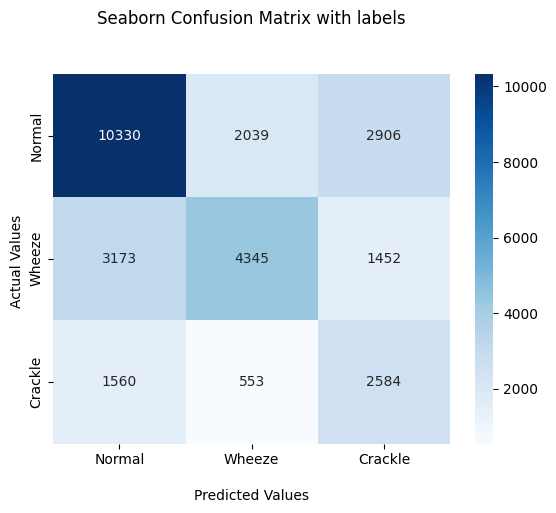

In [41]:
cf_matrix = [[10330,2039,2906],[3173,4345,1452],[1560,553,2584]]
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt=".0f")
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Normal','Wheeze','Crackle'])
ax.yaxis.set_ticklabels(['Normal','Wheeze','Crackle'])
cb = ax.colorbar() 
cb.remove() 